<a href="https://colab.research.google.com/github/DamianDrozd-s29411/Studia/blob/main/EWD_2022_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EWD ćwiczenia 1

Podstawowe biblioteki do analizy danych:
- Pandas
- numPy
- matplotlib
- SciPy
-...


In [1]:
# wywoływanie komend Linuxa np. instalowanie bibliotek pythona

!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
myString = "Hello, EWD!"
myString

'Hello, EWD!'

In [ ]:
type(myString)

str

In [ ]:
liczba= 1.1
type(liczba)

float

In [ ]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [ ]:
len?

In [ ]:
lista=[1,2,3]
lista?

In [ ]:
import numpy as np
import pandas as pd

Pandas
dwie podstawowe struktury danych
- Series - jednowymiarowy obiekt, podobny do tablicy
- DataFrames - obiekt tabelaryczny, podobny do arkusza

In [ ]:
data= pd.Series([1,2,3,4])
data

0    1
1    2
2    3
3    4
dtype: int64

In [ ]:
data= pd.Series([1,2,3,"AA"])
data

0     1
1     2
2     3
3    AA
dtype: object

In [ ]:
data.values

array([1, 2, 3, 'AA'], dtype=object)

In [ ]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
data= pd.Series([1,2,3,4], index=["A", "B", "C", "C"])
data

A    1
B    2
C    3
C    4
dtype: int64

In [ ]:
data.index

Index(['A', 'B', 'C', 'C'], dtype='object')

In [ ]:
print(data["C"])
print(data[0])

C    3
C    4
dtype: int64
1


In [ ]:
oceny_dict = {"student1":3.5, "student2":3.5, "student3":5, "student4":4}
print(oceny_dict)

{'student1': 3.5, 'student2': 3.5, 'student3': 5, 'student4': 4}


In [ ]:
oceny=pd.Series(oceny_dict)
oceny

student1    3.5
student2    3.5
student3    5.0
student4    4.0
dtype: float64

In [ ]:
oceny==3.5

student1     True
student2     True
student3    False
student4    False
dtype: bool

In [ ]:
oceny[oceny==3.5]

student1    3.5
student2    3.5
dtype: float64

In [ ]:
idx_dict = {"student1":1203, "student2":1205, "student3":1215, "student4":1214}
data_oceny_dict = {"student1":"01/02/2021", "student2":"01/03/2021", "student3":"01/02/2021", "student4":"02/02/2021"}

print(idx_dict)
indeksy=pd.Series(idx_dict)
daty=pd.Series(data_oceny_dict)

{'student1': 1203, 'student2': 1205, 'student3': 1215, 'student4': 1214}


In [ ]:
studenci=pd.DataFrame({"ocena":oceny, "indeksy":idx_dict, "data":daty})
studenci

,ocena,indeksy,data
student1,3.5,1203,01/02/2021
student2,3.5,1205,01/03/2021
student3,5.0,1215,01/02/2021
student4,4.0,1214,02/02/2021


In [ ]:
studenci.columns

Index(['ocena', 'indeksy', 'data'], dtype='object')

In [ ]:
studenci.index

Index(['student1', 'student2', 'student3', 'student4'], dtype='object')

In [ ]:
studenci['student'] = studenci.index
studenci=studenci.set_index("indeksy")
studenci

,ocena,data,student
indeksy,,,
1203,3.5,01/02/2021,student1
1205,3.5,01/03/2021,student2
1215,5.0,01/02/2021,student3
1214,4.0,02/02/2021,student4


In [ ]:
studenci["ocena"]==3.5

indeksy
1203     True
1205     True
1215    False
1214    False
Name: ocena, dtype: bool

In [ ]:
studenci[studenci["ocena"]==3.5]

,ocena,data,student
indeksy,,,
1203,3.5,01/02/2021,student1
1205,3.5,01/03/2021,student2


In [ ]:
studenci.isna()

,ocena,data,student
indeksy,,,
1203,False,False,False
1205,False,False,False
1215,False,False,False
1214,False,False,False


In [ ]:
studenci['data'] = pd.to_datetime(studenci['data'],format='%d/%m/%Y')

In [ ]:
studenci

,ocena,data,student
indeksy,,,
1203,3.5,2021-02-01,student1
1205,3.5,2021-03-01,student2
1215,5.0,2021-02-01,student3
1214,4.0,2021-02-02,student4


In [ ]:
from datetime import date

studenci[studenci['data'] < pd.Timestamp(date(2021,3,1))]

,ocena,data,student
indeksy,,,
1203,3.5,2021-02-01,student1
1215,5.0,2021-02-01,student3
1214,4.0,2021-02-02,student4


In [ ]:
#dodaj dane
nowi=pd.DataFrame([[5.0,pd.Timestamp(date(2021,2,3)), "st1"],[2.0, pd.Timestamp(date(2021,2,3)),"st2"]], columns=["ocena", "data", "student"], index=['0001', '0102'])
studenci=studenci.append(nowi)
studenci

,ocena,data,student
1203,3.5,2021-02-01,student1
1205,3.5,2021-03-01,student2
1215,5.0,2021-02-01,student3
1214,4.0,2021-02-02,student4
0001,5.0,2021-02-03,st1
0102,2.0,2021-02-03,st2


In [ ]:
#grupuj po ocenie
for student in studenci.groupby(["ocena"]):
  print(student)

(3.5,          ocena        data   student
indeksy                             
1203       3.5  01/02/2021  student1
1205       3.5  01/03/2021  student2)
(4.0,          ocena        data   student
indeksy                             
1214       4.0  02/02/2021  student4)
(5.0,          ocena        data   student
indeksy                             
1215       5.0  01/02/2021  student3)


In [ ]:
studenci["poprawa"]=["tak" if ocena<3 else "nie" for ocena in studenci["ocena"]]
studenci

,ocena,data,student,poprawa
indeksy,,,,
1203,3.5,01/02/2021,student1,nie
1205,3.5,01/03/2021,student2,nie
1215,5.0,01/02/2021,student3,nie
1214,4.0,02/02/2021,student4,nie


Zadanie

1.Poszukaj danych na temat Rozkładu mocy dawki promieniowania gamma np na portalu otwarte dane. 
2. Kto jest dostawcą danych? Na jakich zasadach udostępnia dane?
3. Z jakich okresów czasu te dane pochodzą?
4. Otwórz wybrany plik na komputerze, ile jest rekordów? Jakie są kolumny? Co oznaczają? Co to jest nSv/h? Czy dane wyglądają poprawnie?
5. Wczytaj przykładowy plik wykorzystując np read_csv z biblioteki pandas. Sprawdź czy wyświetla się poprawnie.
6. Wczytaj wszystkie dane z roku 2022. 
  - jakie są możliwe wartości stacji pomiarowych? (pd.unique)
  - ile lokalizacji jest uwzględnionych?
  - w którym miescie w którym okresie czasu srednie wartosci są najwyższe?
  - jak wyglądają srednie wartości w roku 2022 dla Warszawy? A jak dla Lublina? Spróbuj utworzyć wykresy (DataFrame.plot) 
  - z których województw jest najwięcej pomiarów?

7. Porównaj dane tegoroczne z poprzednimi latami. Jakie informacje można porównać? Jakich miast brakuje? Kiedy?




Rozkład_mocy_dawki_promieniowania_gamma_26.07.22-09.08.22.csv
Rozkład_mocy_dawki_promieniowania_gamma_12.07.22-26.07.22.csv
Rozkład_mocy_dawki_promieniowania_gamma_01.06.22-14.06.22.csv
Rozkład_mocy_dawki_promieniowania_gamma_23.08.22-06.09.22.csv
Rozkład_mocy_dawki_promieniowania_gamma_14.06.22-28.06.22.csv
Rozkład_mocy_dawki_promieniowania_gamma_28.06.22-12.07.22.csv
Rozkład_mocy_dawki_promieniowania_gamma_09.08.22-23.08.22.csv
42 - Liczba miejscowości
Kraków - To jest miasto, gdzie promieniowanie jest najwyższe


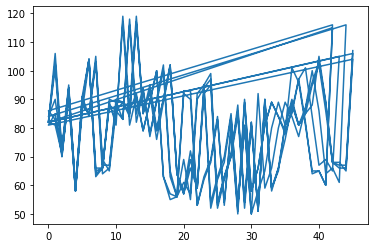

In [251]:
import pandas as pd
import os
import matplotlib.pyplot as plt

DF=pd.DataFrame()
path_dir = '/content/sample_data/Dane/DANE_EWD/DANE_EWD/DANE_EWD/'
for files in os.listdir(path_dir):
  x=pd.read_csv(path_dir+files, encoding="-1250", sep=";")
  x["Data"]=files[-20:-4]
  DF= pd.concat([DF,x])
  print(files)
print(len(pd.unique(DF["Miejscowość (lokalizacja)"].dropna())),"- Liczba miejscowości")

plt.plot(DF["Średnia [nSv/h]"])
x=DF.sort_values(by="Średnia [nSv/h]", ascending=False).head(5)
print(pd.unique(x["Miejscowość (lokalizacja)"])[0], "- To jest miasto, gdzie promieniowanie jest najwyższe")

In [192]:
for i in DF.columns:
  print(i)

Stacje
Miejscowość (lokalizacja)
Zakres średniej dziennej mocy dawki [nSv/h]
Średnia [nSv/h]
Stacje	Miejscowość (lokalizacja)	Zakres średniej dziennej mocy dawki [nSv/h]	Średnia [nSv/h]
